In [38]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
from nepali_date import NepaliDate
import datetime

from nepali_date import NepaliDate

# my_birthday_in_ad = datetime.date(1995, 10, 15)
# my_birthday_in_bs = NepaliDate.to_nepali_date(my_birthday_in_ad)

import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

We are going to do time series analysis and forecasting for YTD sales.

In [54]:
df = pd.read_excel("CARD_DATA_X.xlsx",parse_dates=['REPORT_DATE'])
df.head()
# ytd = df.loc[df['YTD_ACTL'] == 'YTD_ACTL']

,REPORT_DATE,YTD_ACTL
0,2019-04-01,100888107.4
1,2019-04-02,101534952.6
2,2019-04-03,102428461.9
3,2019-04-04,103731464.2
4,2019-04-05,104619964.2


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
REPORT_DATE    60 non-null datetime64[ns]
YTD_ACTL       60 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.0 KB


In [56]:
df['REPORT_DATE'].min()

Timestamp('2019-04-01 00:00:00')

In [57]:
df['REPORT_DATE'].max()

Timestamp('2019-05-30 00:00:00')

## Data preprocessing

This step includes removing columns we do not need, check missing values, aggregate sales by date and so on.

In [61]:

df.sort_values(by=['REPORT_DATE'])

,REPORT_DATE,YTD_ACTL
0,2019-04-01,1.008881e+08
1,2019-04-02,1.015350e+08
2,2019-04-03,1.024285e+08
3,2019-04-04,1.037315e+08
4,2019-04-05,1.046200e+08
5,2019-04-06,1.047469e+08
6,2019-04-07,1.051365e+08
7,2019-04-08,1.054325e+08
8,2019-04-09,1.062305e+08
9,2019-04-10,1.071978e+08


In [62]:
df.isnull().sum()

REPORT_DATE    0
YTD_ACTL       0
dtype: int64

In [70]:
df = df.groupby('REPORT_DATE')['YTD_ACTL'].sum().reset_index()

In [71]:
df.head()

,REPORT_DATE,YTD_ACTL
0,2019-04-01,100888107.4
1,2019-04-02,101534952.6
2,2019-04-03,102428461.9
3,2019-04-04,103731464.2
4,2019-04-05,104619964.2


## Indexing with time series data

In [73]:
df1 = df.set_index('REPORT_DATE')
df1.index

DatetimeIndex(['2019-04-01', '2019-04-02', '2019-04-03', '2019-04-04',
               '2019-04-05', '2019-04-06', '2019-04-07', '2019-04-08',
               '2019-04-09', '2019-04-10', '2019-04-11', '2019-04-12',
               '2019-04-13', '2019-04-14', '2019-04-15', '2019-04-16',
               '2019-04-17', '2019-04-18', '2019-04-19', '2019-04-20',
               '2019-04-21', '2019-04-22', '2019-04-23', '2019-04-24',
               '2019-04-25', '2019-04-26', '2019-04-27', '2019-04-28',
               '2019-04-29', '2019-04-30', '2019-05-01', '2019-05-02',
               '2019-05-03', '2019-05-04', '2019-05-05', '2019-05-06',
               '2019-05-07', '2019-05-08', '2019-05-09', '2019-05-10',
               '2019-05-11', '2019-05-12', '2019-05-13', '2019-05-14',
               '2019-05-15', '2019-05-16', '2019-05-17', '2019-05-18',
               '2019-05-19', '2019-05-20', '2019-05-21', '2019-05-22',
               '2019-05-23', '2019-05-24', '2019-05-25', '2019-05-26',
      

In [74]:
 y = df1.resample('D').mean()


In [75]:
y['2019':]

,YTD_ACTL
REPORT_DATE,
2019-04-01,1.008881e+08
2019-04-02,1.015350e+08
2019-04-03,1.024285e+08
2019-04-04,1.037315e+08
2019-04-05,1.046200e+08
2019-04-06,1.047469e+08
2019-04-07,1.051365e+08
2019-04-08,1.054325e+08
2019-04-09,1.062305e+08


## Visualizing  sales time series 


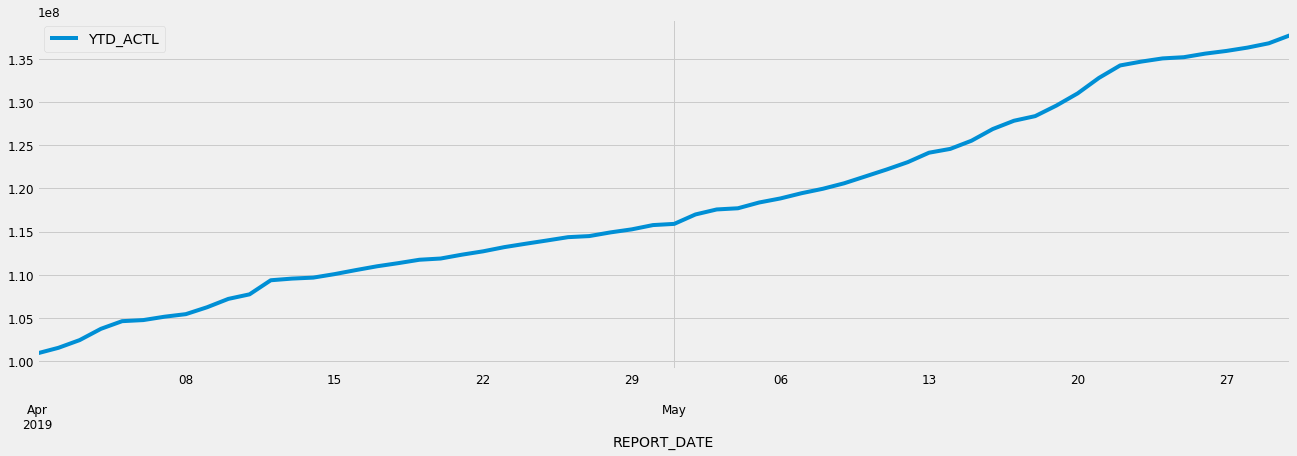

In [77]:
y.plot(figsize=(20, 6))
plt.show()

In [94]:
y = y['YTD_ACTL']
y.head()

REPORT_DATE
2019-04-01    100888107.4
2019-04-02    101534952.6
2019-04-03    102428461.9
2019-04-04    103731464.2
2019-04-05    104619964.2
Freq: D, Name: YTD_ACTL, dtype: float64

In [98]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
def test_stationarity(y):
    
    #Determing rolling statistics
    rolmean = y.rolling(12).mean()
    rolstd = y.rolling(12).mean()

    #Plot rolling statistics:
    orig = plt.plot(y, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(y, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

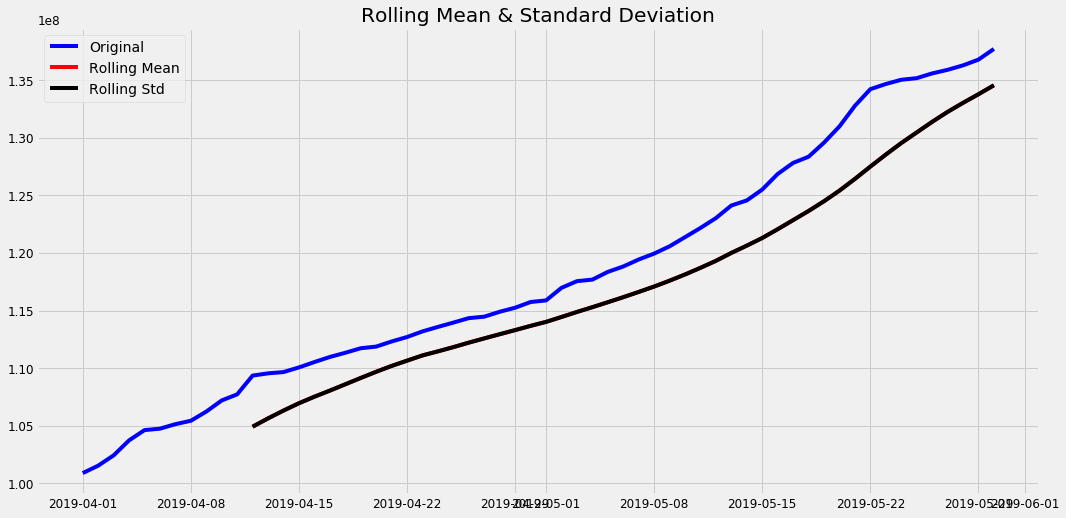

Results of Dickey-Fuller Test:
Test Statistic                  0.751437
p-value                         0.990810
#Lags Used                      1.000000
Number of Observations Used    58.000000
Critical Value (1%)            -3.548494
Critical Value (5%)            -2.912837
Critical Value (10%)           -2.594129
dtype: float64


In [99]:
test_stationarity(y)

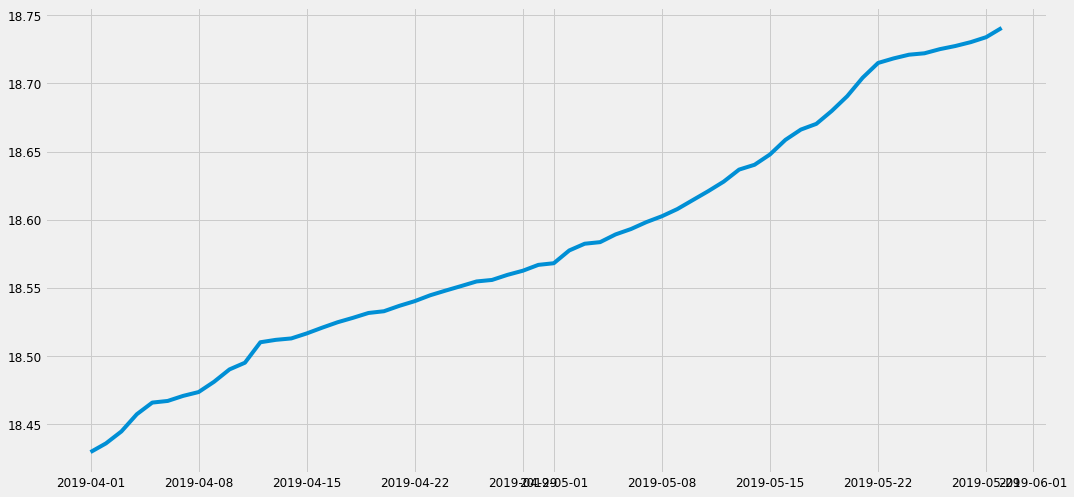

In [100]:
ts_log = np.log(y)
plt.plot(ts_log)

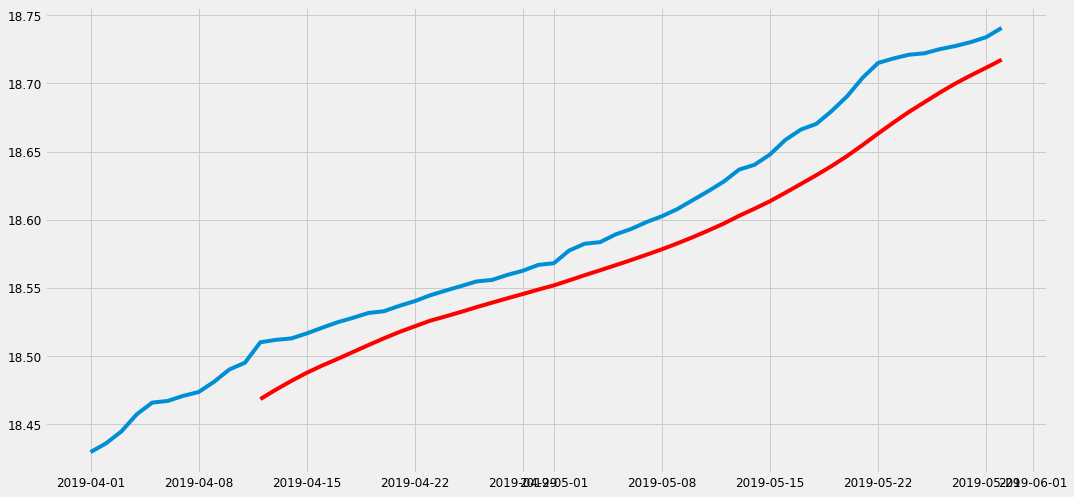

In [103]:
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [134]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(365)

REPORT_DATE
2019-04-01         NaN
2019-04-02         NaN
2019-04-03         NaN
2019-04-04         NaN
2019-04-05         NaN
2019-04-06         NaN
2019-04-07         NaN
2019-04-08         NaN
2019-04-09         NaN
2019-04-10         NaN
2019-04-11         NaN
2019-04-12    0.041686
2019-04-13    0.036587
2019-04-14    0.031204
2019-04-15    0.028874
2019-04-16    0.027808
2019-04-17    0.026884
2019-04-18    0.025065
2019-04-19    0.023538
2019-04-20    0.019869
2019-04-21    0.019193
2019-04-22    0.018470
2019-04-23    0.018656
2019-04-24    0.018937
2019-04-25    0.018950
2019-04-26    0.018853
2019-04-27    0.016684
2019-04-28    0.017183
2019-04-29    0.017078
2019-04-30    0.018126
2019-05-01    0.016288
2019-05-02    0.021937
2019-05-03    0.023085
2019-05-04    0.020644
2019-05-05    0.022588
2019-05-06    0.022785
2019-05-07    0.023972
2019-05-08    0.024264
2019-05-09    0.025194
2019-05-10    0.027201
2019-05-11    0.028898
2019-05-12    0.030794
2019-05-13    0.033908

In [135]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

REPORT_DATE
2019-04-12    0.041686
2019-04-13    0.036587
2019-04-14    0.031204
2019-04-15    0.028874
2019-04-16    0.027808
Freq: D, Name: YTD_ACTL, dtype: float64

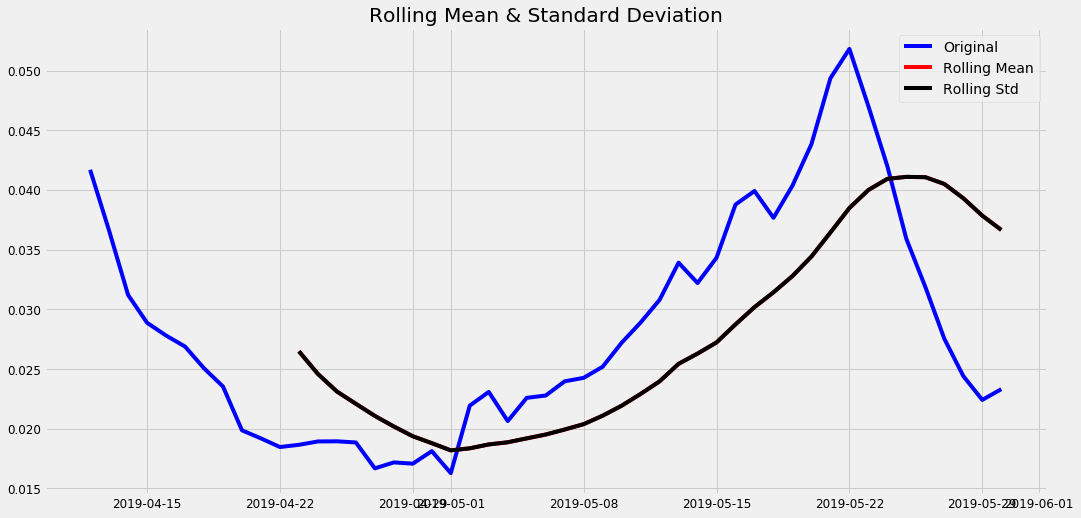

Results of Dickey-Fuller Test:
Test Statistic                 -1.792134
p-value                         0.384374
#Lags Used                      1.000000
Number of Observations Used    47.000000
Critical Value (1%)            -3.577848
Critical Value (5%)            -2.925338
Critical Value (10%)           -2.600774
dtype: float64


In [136]:
test_stationarity(ts_log_moving_avg_diff)

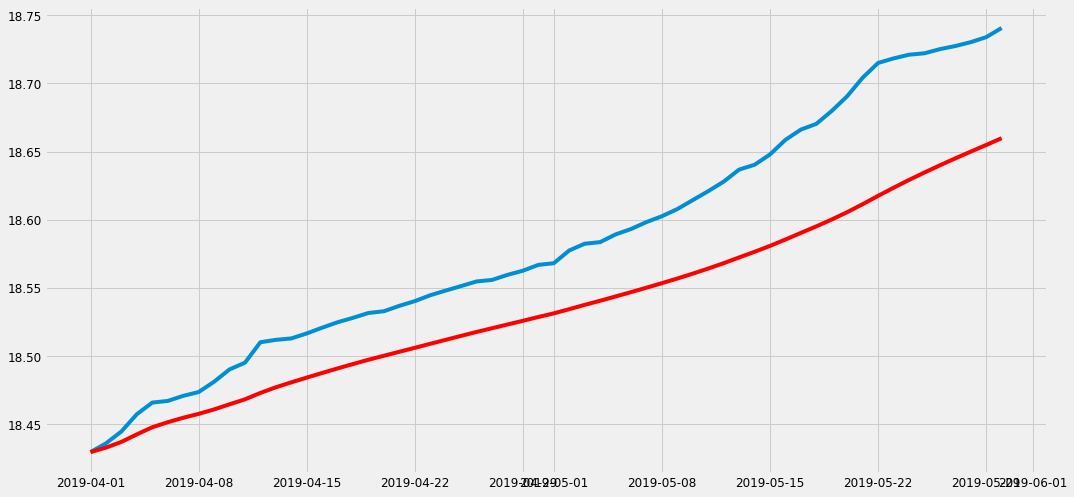

In [110]:
expwighted_avg = ts_log.ewm( halflife=12).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

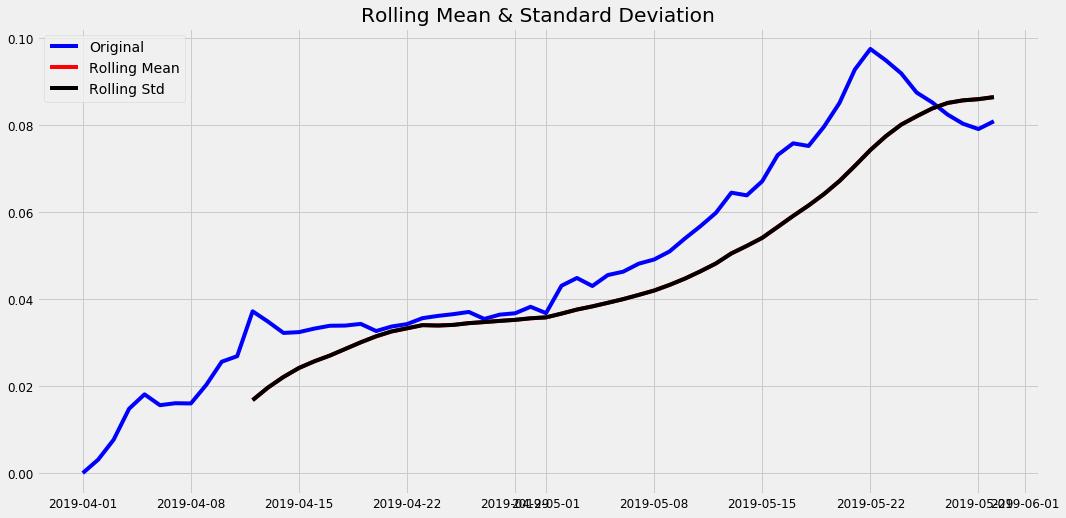

Results of Dickey-Fuller Test:
Test Statistic                 -1.252952
p-value                         0.650413
#Lags Used                      1.000000
Number of Observations Used    58.000000
Critical Value (1%)            -3.548494
Critical Value (5%)            -2.912837
Critical Value (10%)           -2.594129
dtype: float64


In [111]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

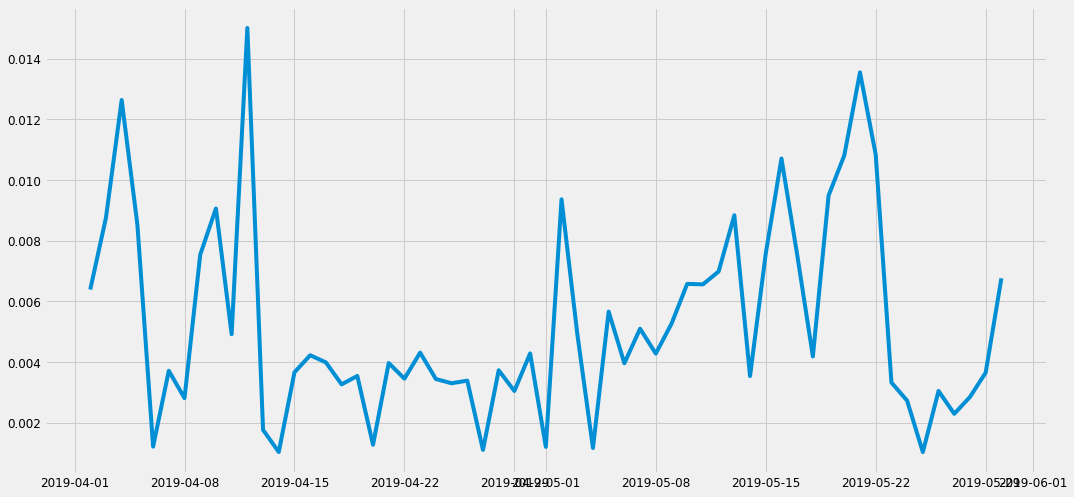

In [112]:
#Take first difference:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

In [113]:
ts_log_diff.isnull().sum()

1

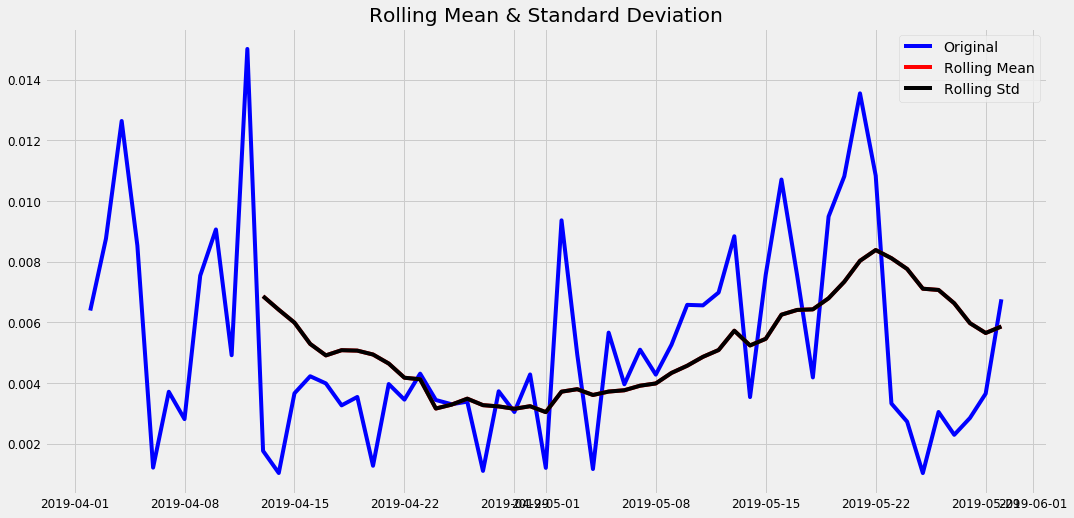

Results of Dickey-Fuller Test:
Test Statistic                 -5.028998
p-value                         0.000019
#Lags Used                      0.000000
Number of Observations Used    58.000000
Critical Value (1%)            -3.548494
Critical Value (5%)            -2.912837
Critical Value (10%)           -2.594129
dtype: float64


In [114]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

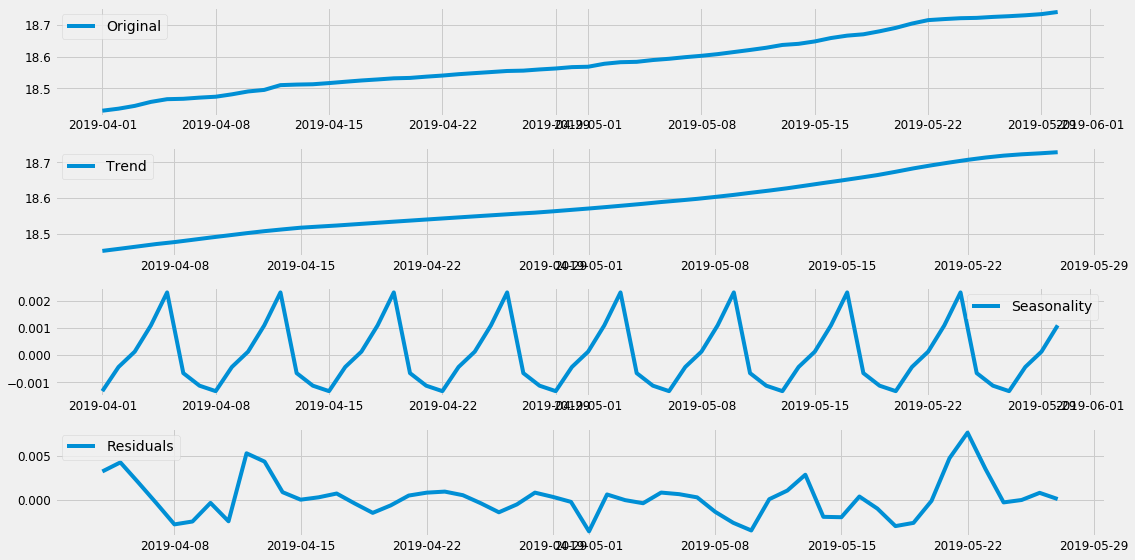

In [115]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

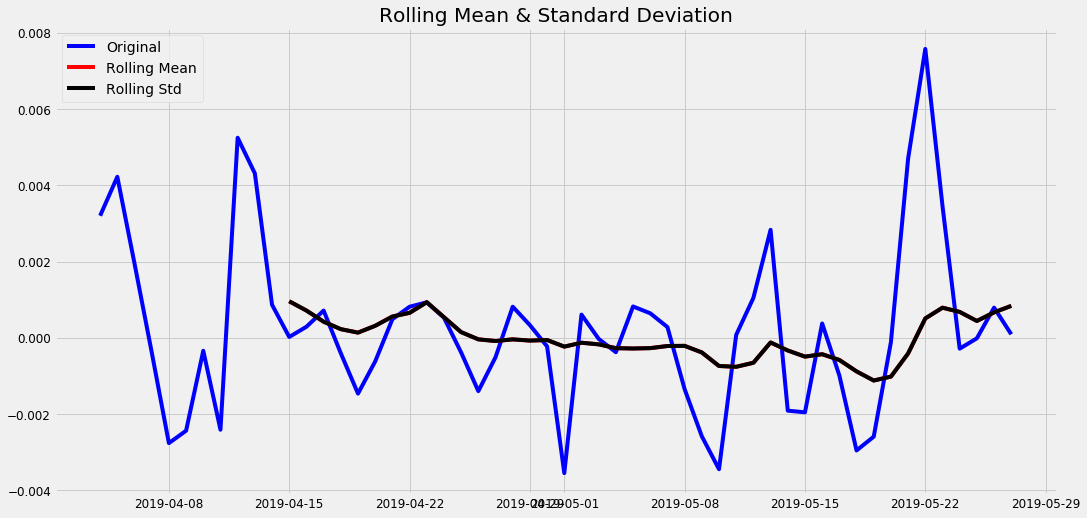

Results of Dickey-Fuller Test:
Test Statistic                 -5.495420
p-value                         0.000002
#Lags Used                      1.000000
Number of Observations Used    52.000000
Critical Value (1%)            -3.562879
Critical Value (5%)            -2.918973
Critical Value (10%)           -2.597393
dtype: float64


In [116]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

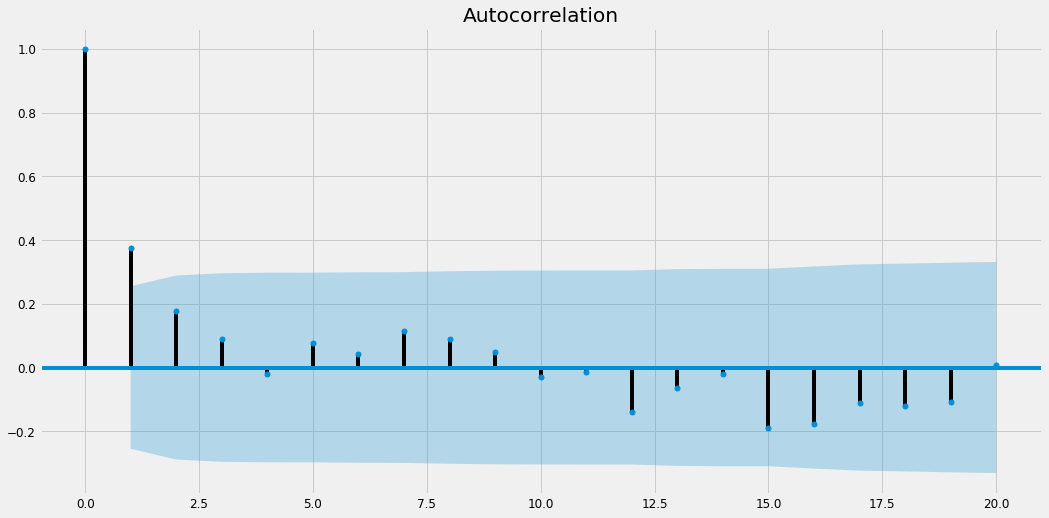

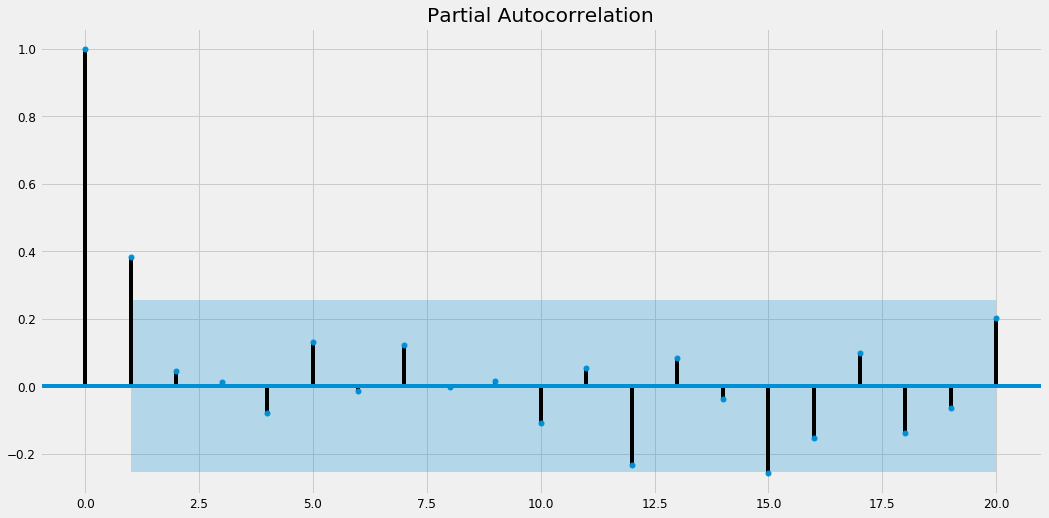

In [117]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(ts_log_diff, lags =20)
plot_pacf(ts_log_diff, lags =20)

plt.show()

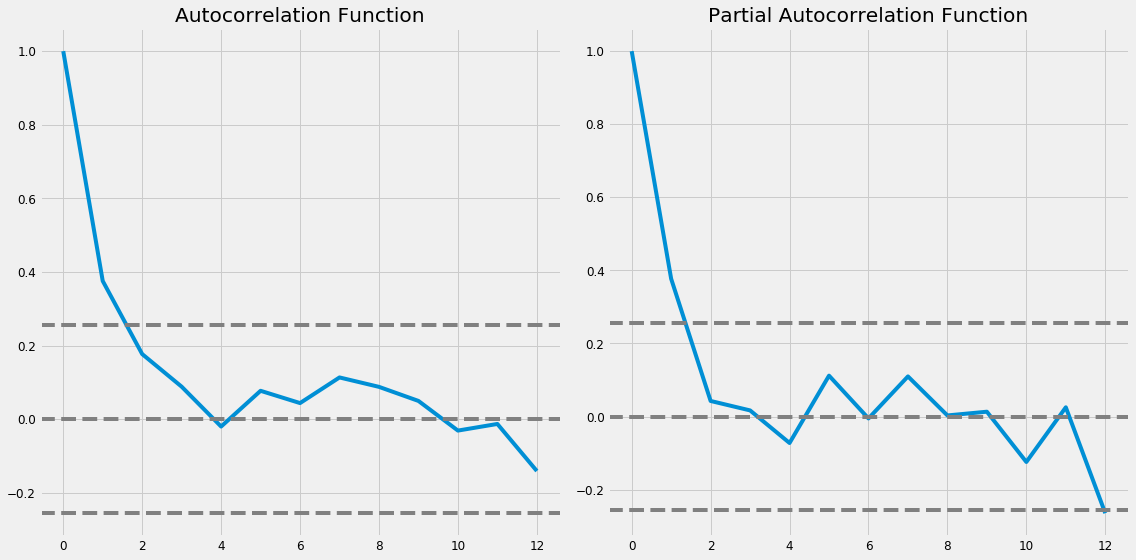

In [118]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMA
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf  

lag_acf = acf(ts_log_diff, nlags=12)
lag_pacf = pacf(ts_log_diff, nlags=12, method='ols')

#Plot ACF:    
plt.subplot(121)    
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

Text(0.5, 1.0, 'RSS:0.0005')

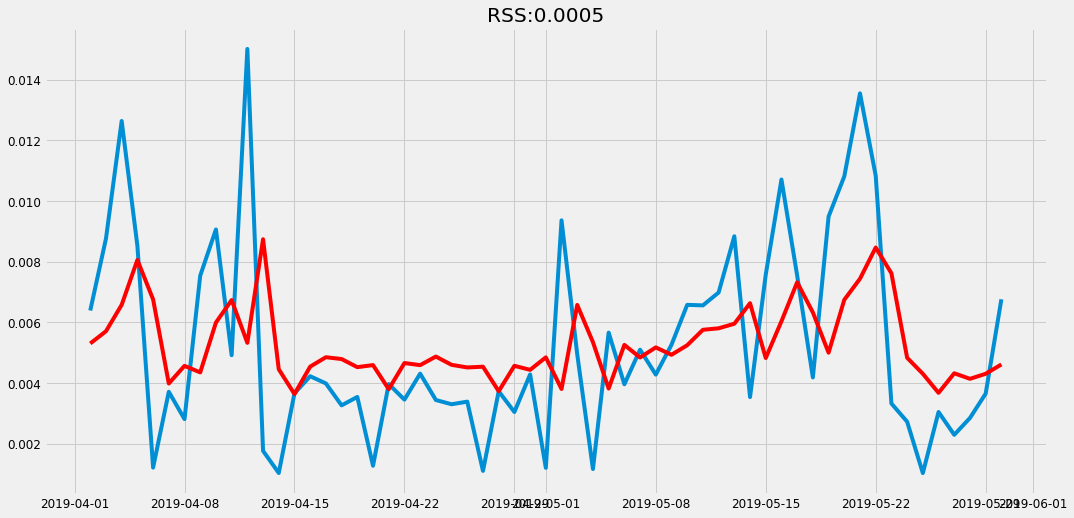

In [120]:
#MA MODEL
model=ARIMA(ts_log,order=(2,1,0))
results_AR=model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS:%.4f'%sum((results_AR.fittedvalues-ts_log_diff)**2))

Text(0.5, 1.0, 'RSS:0.0005')

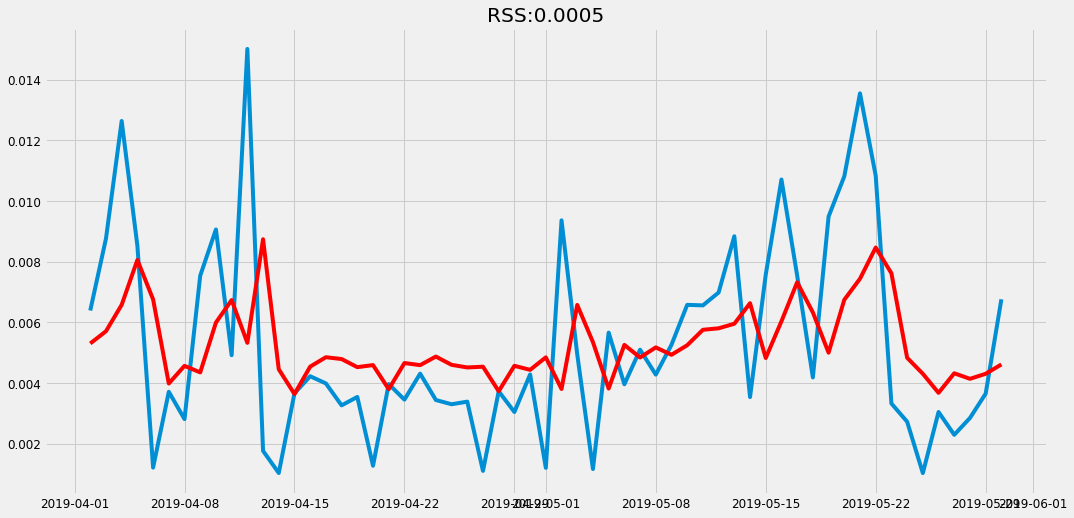

In [121]:

model=ARIMA(ts_log,order=(0,1,2))
results_MA=model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS:%.4f'%sum((results_AR.fittedvalues-ts_log_diff)**2))

Text(0.5, 1.0, 'RSS:0.0005')

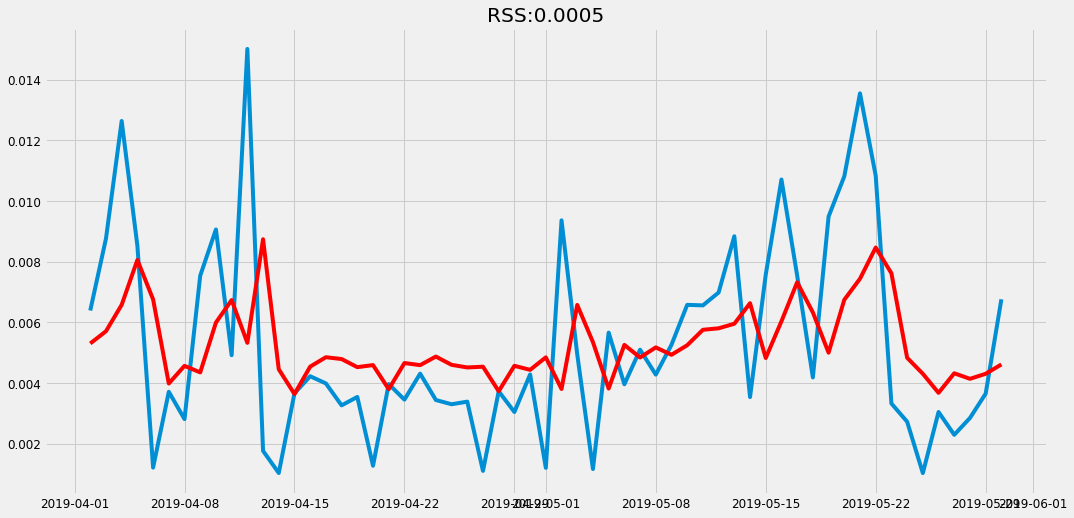

In [122]:

model=ARIMA(ts_log,order=(2,1,2))
results_ARIMA=model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS:%.4f'%sum((results_AR.fittedvalues-ts_log_diff)**2))

In [125]:
predictions_ARIMA_diff=pd.Series(results_ARIMA.fittedvalues,copy=True)
predictions_ARIMA_diff.head()

REPORT_DATE
2019-04-02    0.005205
2019-04-03    0.005428
2019-04-04    0.005894
2019-04-05    0.006656
2019-04-06    0.005772
Freq: D, dtype: float64

In [127]:
predictions_ARIMA_diff_cumsum=predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

REPORT_DATE
2019-04-02    0.005205
2019-04-03    0.010634
2019-04-04    0.016528
2019-04-05    0.023184
2019-04-06    0.028955
Freq: D, dtype: float64

In [130]:
predictions_ARIMA_log=pd.Series(ts_log.ix[0],index=ts_log.index)
predictions_ARIMA_log=predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

REPORT_DATE
2019-04-01    18.429523
2019-04-02    18.434728
2019-04-03    18.440156
2019-04-04    18.446050
2019-04-05    18.452706
Freq: D, dtype: float64

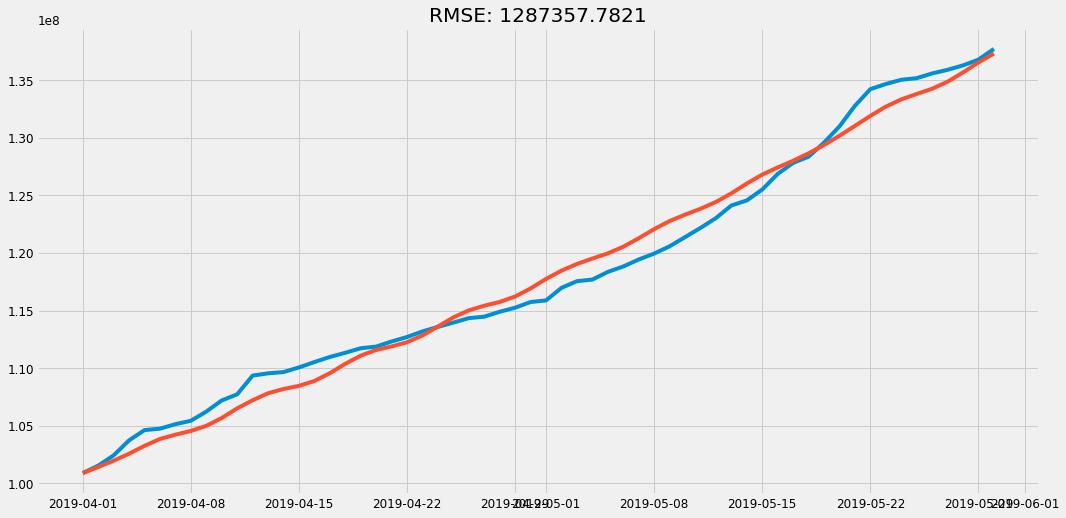

In [137]:
predictions_ARIMA=np.exp(predictions_ARIMA_log)
plt.plot(y)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-y)**2)/len(y)))
plt.savefig("ytd.png")